# CUDA-tSNE Problem

I'm interested in using the t-SNE-CUDA in order to speed up the analisys that I'm doing.
This is because I have a large ammount of (here, I only show part of the data) data and the sklearn function takes a really long time to compute.
I've also tested the python Multicore-tSNE and it works fine, but I want to accelerate even more my calculations using the GPU acceleration.

Below you have the example of how I compute the calculations using the sklearn and Multicore-tSNE:
(In order to explain the dimensionality of the data, the input comes from Molecular Dinamics simulations
5000frames x 3024atom_coordinates)

Sources Link: https://drive.google.com/file/d/1YA_V1HKPXKu17mb4foPOoY317K72cLFL/view?usp=sharing

In [ ]:
import tsnecuda
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import manifold
from MulticoreTSNE import MulticoreTSNE
%matplotlib inline

In [3]:
sources = pickle.load(open("tSNE_input.p", "rb"))
print(type(sources))
sources.shape

<class 'numpy.ndarray'>


(5000, 3024)

Text(0.5,1,'Multicore')

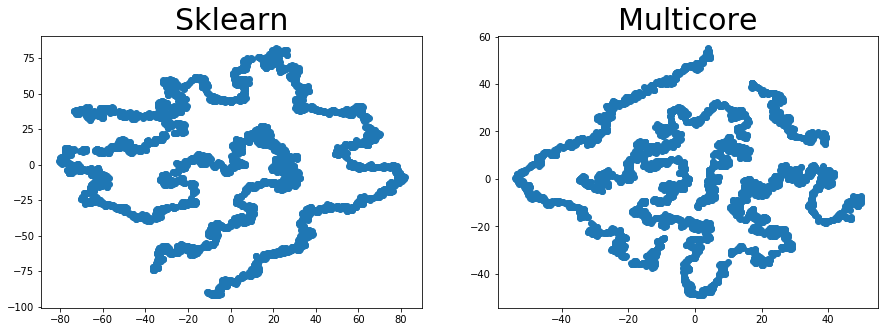

In [1]:
sk_tsne = manifold.TSNE().fit_transform(sources)
mc_tsne = MulticoreTSNE().fit_transform(sources)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(sk_tsne[:,0],sk_tsne[:,1])
ax1.set_title('Sklearn',fontsize=30)
ax2.scatter(mc_tsne[:,0],mc_tsne[:,1])
ax2.set_title('Multicore',fontsize=30)

#### Later on, I tried to compute the same using CUDA-tSNE, but the notebook crashes, and I've translated the code in a simple python script and the following error apears:

python c-tsne.py 
<class 'numpy.ndarray'> (5000, 3024)
1299, -1
1292, -1
1346, -1
1297, -1
1283, -1
1296, -1
1307, -1
1277, -1
1277, -1
1277, -1
1318, -1
1293, -1
1300, -1
1311, -1
1284, -1
1412, -1
1412, -1
1447, -1
1447, -1
1455, -1
1464, -1
1464, -1
1458, -1
1469, -1
1485, -1
1498, -1
1498, -1
1525, -1
1530, -1
1565, -1
1613, -1
1639, -1
1646, -1
1669, -1
1669, -1
1670, -1
1669, -1
1669, -1
1701, -1
GPUassert: an illegal memory access was encountered /home/rmrao/miniconda3/conda-bld/tsnecuda_1538693499277/work/src/util/cuda_utils.cu 55


c-tsne.py =

import tsnecuda
import matplotlib.pyplot as plt
import pickle

sources = pickle.load(open("tSNE_input.p", "rb"))

tsne = tsnecuda.TSNE().fit_transform(sources)

plt.scatter(tsne[:,0],tsne[:,1])
plt.show()


#### The error shows a path that does not exist in my computer.

#### When I replace the sources from a random numbers array with the same shape, it works fine: 

<class 'numpy.ndarray'> (5000, 3024)


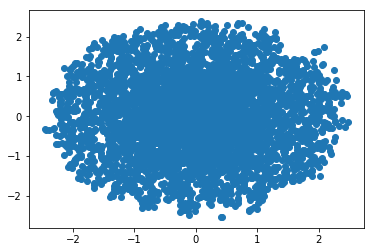

In [5]:
import tsnecuda
import numpy as np
import matplotlib.pyplot as plt
import pickle

sources = np.random.rand(5000, 3024)
print(type(sources),sources.shape)

tsne = tsnecuda.TSNE().fit_transform(sources)

plt.scatter(tsne[:,0],tsne[:,1])
plt.show()


## System information:

OS: CentOS Linux 7

GPU: nvidia GeForce GTX980 

Python 3.6.3 

In [ ]:
Conda list output:
    
# packages in environment at /home/miquel/miniconda2/envs/py3:
#
# Name                    Version                   Build  Channel
alembic                   0.9.5            py36h968a0d3_0  
apptools                  4.4.0                     <pip>
asn1crypto                0.24.0                    <pip>
attrs                     17.3.0                    <pip>
backcall                  0.1.0                     <pip>
bhmm                      0.6.2                     <pip>
biopandas                 0.2.2                     <pip>
blas                      1.0                         mkl  
bleach                    2.1.3                     <pip>
bleach                    2.0.0            py36h688b259_0  
bokeh                     0.12.13                   <pip>
bzip2                     1.0.6                         1    conda-forge
ca-certificates           2018.8.24            ha4d7672_0    conda-forge
certifi                   2018.8.24             py36_1001    conda-forge
certifi                   2017.7.27.1               <pip>
cffi                      1.11.2                    <pip>
chardet                   3.0.4                     <pip>
compbiolab                0.1.5                     <pip>
configobj                 5.0.6                     <pip>
configurable-http-proxy   3.0.0                         0    conda-forge
coverage                  4.4.2                     <pip>
cryptography              2.1.3                     <pip>
cuda80                    1.0                           0    cannylab
cudatoolkit               8.0                           3  
cycler                    0.10.0           py36h93f1223_0  
dbus                      1.10.22              h3b5a359_0  
decorator                 4.1.2            py36hd076ac8_0  
decorator                 4.3.0                     <pip>
entrypoints               0.2.3            py36h1aec115_2  
expat                     2.2.4                h6ea4f2b_2  
faiss-cpu                 1.4.0            py36_cuda0.0_1    pytorch
faiss-gpu                 1.4.0           py36_cuda8.0.61_1    pytorch
fontconfig                2.12.4               h88586e7_1  
freetype                  2.8                  h52ed37b_0  
glib                      2.53.6               h5d9569c_2  
gmp                       6.1.2                hb3b607b_0  
gst-plugins-base          1.12.2               he3457e5_0  
gstreamer                 1.12.2               h4f93127_0  
h5py                      2.7.0            py36he81ebca_1  
hdf5                      1.10.1               hb0523eb_0  
hlt-client                1.0.4                     <pip>
html5lib                  1.0.1                     <pip>
html5lib                  0.999999999      py36h2cfc398_0  
hypothesis                3.34.1                    <pip>
icu                       58.2                 h211956c_0  
idna                      2.5                       <pip>
inflection                0.3.1                     <pip>
inflection                0.3.1                    py36_0  
intel-openmp              2018.0.0             h15fc484_7  
ipykernel                 4.8.2                     <pip>
ipykernel                 4.6.1            py36hbf841aa_0  
ipymol                    0.5                       <pip>
ipython                   6.5.0                     <pip>
ipython                   6.1.0            py36hc72a948_1  
ipython_genutils          0.2.0            py36hb52b0d5_0  
ipywidgets                7.0.0            py36h7b55c3a_0  
ipywidgets                7.4.0                     <pip>
jedi                      0.12.1                    <pip>
jedi                      0.10.2           py36h552def0_0  
jinja2                    2.9.6            py36h489bce4_1  
Jinja2                    2.10                      <pip>
joblib                    0.11                     py36_0  
jpeg                      9b                   h376031c_1  
jsonschema                2.6.0            py36h006f8b5_0  
jupyter                   1.0.0            py36h9896ce5_0  
jupyter-client            5.2.3                     <pip>
jupyter-core              4.4.0                     <pip>
jupyter_client            5.1.0            py36h614e9ea_0  
jupyter_console           5.2.0            py36he59e554_1  
jupyter_core              4.3.0            py36h357a921_0  
jupyterhub                0.8.0                    py36_0    conda-forge
libedit                   3.1                  heed3624_0  
libffi                    3.2.1                hd88cf55_4  
libgcc                    7.2.0                h69d50b8_2  
libgcc-ng                 7.2.0                h7cc24e2_2  
libgfortran               3.0.0                         1  
libgfortran-ng            7.2.0                h9f7466a_2  
libgpuarray               0.6.9                         0  
libiconv                  1.15                 h63c8f33_5  
libpng                    1.6.32               hda9c8bc_2  
libsodium                 1.0.13               h31c71d8_2  
libstdcxx-ng              7.2.0                h7a57d05_2  
libxcb                    1.12                 h84ff03f_3  
libxml2                   2.9.4                h6b072ca_5  
llvmlite                  0.20.0                   py36_0  
lzo                       2.10                          0    conda-forge
mako                      1.0.7            py36h0727276_0  
markupsafe                1.0              py36hd9260cd_1  
matplotlib                2.1.0            py36hba5de38_0  
mdtraj                    1.9.1                    py36_0    omnia
mistune                   0.7.4            py36hbab8784_0  
mistune                   0.8.3                     <pip>
mkl                       2018.0.0             hb491cac_4  
mkl-service               1.1.2            py36h17a0993_4  
more-itertools            3.2.0                    py36_0  
more-itertools            3.2.0                     <pip>
msmtools                  1.2.1                     <pip>
MulticoreTSNE             0.1                       <pip>
nbconvert                 5.3.1            py36hb41ffb7_0  
nbformat                  4.4.0            py36h31c9010_0  
ncurses                   6.0                  h06874d7_1  
networkx                  2.0                       <pip>
nglview                   1.1.6                      py_0    conda-forge
nodejs                    6.11.2               h3db8ef7_0  
nose                      1.3.7            py36hcdf7029_2  
notebook                  5.6.0                     <pip>
notebook                  5.2.1            py36h690a4eb_0  
numba                     0.35.0             np113py36_10  
numexpr                   2.6.4                    py36_0    conda-forge
numpy                     1.14.2           py36hdbf6ddf_0  
nxviz                     0.3.4                     <pip>
openblas                  0.3.3                ha44fe06_0    conda-forge
openssl                   1.0.2p               h470a237_0    conda-forge
palettable                3.1.0                     <pip>
pamela                    0.3.0                    py36_0    conda-forge
pandas                    0.21.0           py36h78bd809_1  
pandoc                    1.19.2.1             hea2e7c5_1  
pandocfilters             1.4.2            py36ha6701b7_1  
parso                     0.3.1                     <pip>
path.py                   10.3.1           py36he0c6f6d_0  
patsy                     0.4.1            py36ha3be15e_0  
pcre                      8.41                 hc71a17e_0  
pexpect                   4.6.0                     <pip>
pexpect                   4.2.1            py36h3b9d41b_0  
pickleshare               0.7.4            py36h63277f8_0  
Pillow                    5.2.0                     <pip>
pip                       9.0.1            py36h6c6f9ce_4  
ProDy                     1.9.3                     <pip>
progress-reporter         1.4                       <pip>
prometheus-client         0.3.1                     <pip>
prompt_toolkit            1.0.15           py36h17d85b1_0  
psutil                    5.4.3                     <pip>
ptyprocess                0.5.2            py36h69acd42_0  
ptyprocess                0.6.0                     <pip>
py                        1.5.2                     <pip>
pycparser                 2.18                      <pip>
pyEMMA                    2.4                       <pip>
pyface                    5.1.0                     <pip>
pygments                  2.2.0            py36h0d3125c_0  
pygpu                     0.6.9                    py36_0  
pymc3                     3.2              py36h89408ba_0  
pyparsing                 2.2.0            py36hee85983_1  
pyqt                      5.6.0            py36h0386399_5  
pytables                  3.4.2                    py36_7    conda-forge
pytest                    3.2.3                     <pip>
python                    3.6.3                h1284df2_4  
python-dateutil           2.7.3                     <pip>
python-dateutil           2.6.1            py36h88d3b88_1  
python-editor             1.0.3            py36h928c527_0  
python-oauth2             1.0.1                    py36_0    conda-forge
pytraj                    2.0.2                     <pip>
pytz                      2017.2           py36hc2ccc2a_1  
PyYAML                    3.12                      <pip>
pyzmq                     17.1.2                    <pip>
pyzmq                     16.0.2           py36h3b0cf96_2  
qt                        5.6.2               h974d657_12  
qtconsole                 4.3.1            py36h8f73b5b_0  
quandl                    3.2.0            py36h3624063_0  
Quandl                    3.2.0                     <pip>
readline                  7.0                  hb321a52_4  
requests                  2.14.2                   py36_0  
requests                  2.17.3                    <pip>
scikit-learn              0.19.0                    <pip>
scipy                     1.0.0            py36hbf646e7_0  
seaborn                   0.8.0            py36h197244f_0  
Send2Trash                1.5.0                     <pip>
setuptools                36.5.0           py36he42e2e1_0  
setuptools                40.0.0                    <pip>
simplegeneric             0.8.1            py36h2cb9092_0  
sip                       4.18.1           py36h51ed4ed_2  
six                       1.11.0           py36h372c433_1  
sklearn                   0.0                       <pip>
sphinxcontrib-fulltoc     1.2.0                     <pip>
sqlalchemy                1.1.13           py36hfb5efd7_0  
sqlite                    3.20.1               hb898158_2  
statsmodels               0.8.0            py36h8533d0b_0  
style                     1.1.0                     <pip>
terminado                 0.8.1                     <pip>
terminado                 0.6              py36ha25a19f_0  
testpath                  0.3.1            py36h8cadb63_0  
theano                    0.9.0                    py36_0  
thermotools               0.2.6                     <pip>
tk                        8.6.7                hc745277_3  
tornado                   5.1                       <pip>
tornado                   4.5.2            py36h1283b2a_0  
tqdm                      4.19.4           py36ha5a5176_0  
traitlets                 4.3.2            py36h674d592_0  
traits                    4.6.0                     <pip>
traitsui                  5.1.0                     <pip>
tsnecuda                  0.1.1             py36_cuda80_0  [cuda80]  cannylab
tsnecuda                  0.1.1                     <pip>
update                    0.0.1                     <pip>
urllib3                   1.21.1                    <pip>
virtualenv                15.1.0                    <pip>
wcwidth                   0.1.7            py36hdf4376a_0  
webencodings              0.5.1            py36h800622e_1  
wheel                     0.29.0           py36he7f4e38_1  
widgetsnbextension        3.4.0                     <pip>
widgetsnbextension        3.0.2            py36hd01bb71_1  
xz                        5.2.3                h55aa19d_2  
zeromq                    4.2.2                hbedb6e5_2  
zlib                      1.2.11               ha838bed_2  
zstd                      1.3.1                     <pip>


In [ ]:
nvidia-smi output:
    
Fri Oct  5 15:11:39 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.98                 Driver Version: 384.98                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 980     Off  | 00000000:01:00.0  On |                  N/A |
| 31%   41C    P2    43W / 180W |    232MiB /  4037MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU       PID   Type   Process name                             Usage      |
|=============================================================================|
|    0      1692      G   /usr/bin/X                                    72MiB |
|    0     22215      C   ...e/miquel/miniconda2/envs/py3/bin/python   146MiB |
+-----------------------------------------------------------------------------+
